# Task-3:To explore unsupervised learning
 
   Given Dataset Iris

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn import preprocessing

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
import seaborn as sns

# Loading Dataset

In [26]:
data_set=pd.read_csv('iris.csv')
data_set.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
data_set=data_set.drop('Id', axis=1)
data_set.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
data_set.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [101]:
X=data_set.iloc[:,0:4]
Y=data_set.iloc[:,-1]

In [102]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [103]:
Y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [76]:
print(x.sample(5))
print(y.sample(5))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
6              4.6           3.4            1.4           0.3
34             4.9           3.1            1.5           0.1
2              4.7           3.2            1.3           0.2
100            6.3           3.3            6.0           2.5
14             5.8           4.0            1.2           0.2
85     Iris-versicolor
62     Iris-versicolor
103     Iris-virginica
107     Iris-virginica
18         Iris-setosa
Name: Species, dtype: object


# Visualize Data

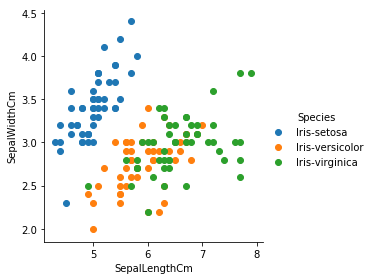

In [77]:
sns.FacetGrid(data_set, hue="Species", height=4)\
.map(plt.scatter, "SepalLengthCm", "SepalWidthCm")\
.add_legend();

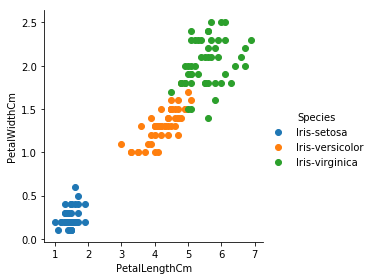

In [32]:
sns.FacetGrid(data_set, hue="Species", height=4) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();

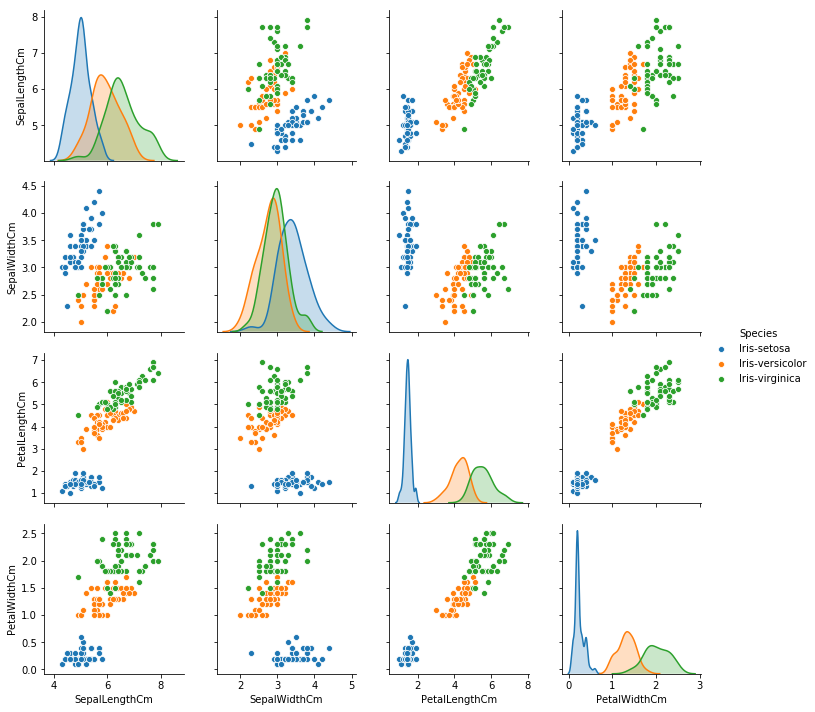

In [33]:
sns.pairplot(data_set,hue="Species")

# Feature Scaling

In [104]:
scaler=preprocessing.StandardScaler()
scaler.fit(X)
X_scaled_array=scaler.transform(X)
X_scaled=pd.DataFrame(X_scaled_array,columns=X.columns)
X_scaled.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
25,-1.021849,-0.124958,-1.227541,-1.312977
68,0.432165,-1.976181,0.421564,0.396172
20,-0.537178,0.800654,-1.170675,-1.312977
66,-0.294842,-0.124958,0.421564,0.396172
41,-1.627688,-1.744778,-1.398138,-1.181504


# Elbow Method

In [105]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    x=kmeans.inertia_
    wcss.append(x)    

In [106]:
wcss

[600.0,
 223.73200573676345,
 140.96581663074699,
 114.38954350297054,
 91.19197002146466,
 80.19300510158155,
 70.93964372756813,
 62.87956074327274,
 54.81201113570776,
 47.336889814661156]

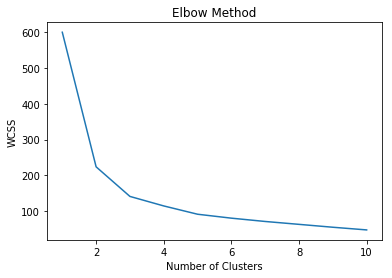

In [107]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# K-Means Clustering

In [108]:
# From the Above elbow method it is clear that optimum number of clusters are 3
kmeans_3=KMeans(n_clusters=3)
kmeans_3.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [109]:
new_labels=kmeans_3.fit_predict(X_scaled)

In [110]:
new_lbels  # Labels predicted by the Kmeans 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

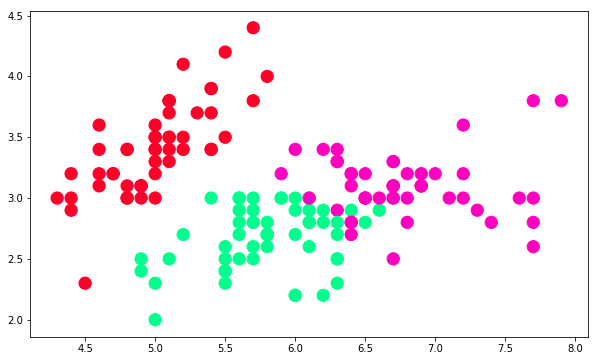

In [114]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1],c=new_labels,cmap='gist_rainbow',s=150)